# Air Pollution During Lockdown - India
The dataset contains air quality data and AQI (Air Quality Index) at hourly and daily level of various stations across multiple cities in India.  
## Cities
Ahmedabad, Aizawl, Amaravati, Amritsar, Bengaluru, Bhopal, Brajrajnagar, Chandigarh, Chennai, Delhi, Ernakulam, Gurugram, Guwahati, Hyderabad, Jaipur, Jorapokhar, Kochi, Kolkata, Lucknow, Mumbai, Patna, Shillong, Talcher, Thiruvananthapuram, Visakhapatnam  
  
The data has been made publicly available by the Central Pollution Control Board: https://cpcb.nic.in/ which is the official portal of Government of India. They also have a real-time monitoring app: https://app.cpcbccr.com/AQI_India/

### Import Dependencies

In [10]:
%matplotlib notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datetime

In [11]:
city_data = pd.read_csv('city_day.csv')
city_data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
city_data.shape

(27986, 16)

In [5]:
print("Total null records in Data:\n", city_data.isnull().sum())

Total null records in Data:
 City              0
Date              0
PM2.5          4522
PM10          11002
NO             3459
NO2            3465
NOx            4081
NH3           10060
CO             2020
SO2            3771
O3             3888
Benzene        5325
Toluene        7654
Xylene        16928
AQI            4573
AQI_Bucket     4573
dtype: int64


#### Citywise instamces of Severe bucket of Air Quality index.
Here Ahmedabad, Delhi, Patna seems to be highets in case and Ahemdabad to be very much higher than others.

In [7]:
city_data[city_data['AQI_Bucket'] == 'Severe']['City'].value_counts()

Ahmedabad     638
Delhi         239
Patna         174
Lucknow       110
Gurugram       95
Talcher        24
Jorapokhar     18
Kolkata        13
Hyderabad       7
Chennai         6
Amritsar        6
Guwahati        5
Jaipur          2
Name: City, dtype: int64

In [24]:
pd.to_datetime(city_data[(city_data['AQI_Bucket'] == 'Severe') &
                         (city_data['City'] == 'Ahmedabad')]['Date']).dt.year.value_counts()

2018    277
2019    224
2015     51
2017     37
2020     29
2016     20
Name: Date, dtype: int64

As we can here, in the city of Ahmedabad in year 2018, 2019 more severe instances has been found. In 2018 around 3/4 year, the condition of air quality was severe. As the whole data of 2020 is not available we see it down the list.

In [25]:
city_data['Date'] = pd.to_datetime(city_data['Date'])

city_data[(city_data['AQI_Bucket'] == 'Severe') & (city_data['City'] == 'Ahmedabad')
         & (city_data.Date.dt.year != 2020)].Date.dt.month.value_counts()

11    70
10    70
8     62
7     60
3     57
2     56
1     49
9     47
4     47
12    36
6     33
5     22
Name: Date, dtype: int64

Here we can clearly see that the month of May, June and December we always have very less pollution as compared to other months.This might be because the Firecrackers in Diwali. To find out the real cause is firecrackers or not we have to see yearly which month Diwali was in which year and did that month spiked up the pollution.

Firstly in 2018 diwali was in November and in 2019 it was in October.

In [28]:
city_data[(city_data.City == 'Ahmedabad') 
          & (city_data.Date.dt.year == 2018)].groupby(city_data.Date.dt.month)['AQI'].sum()

Date
1     20765.0
2     24232.0
3     24218.0
4     16688.0
5      9364.0
6     12915.0
7     14068.0
8     14431.0
9     15056.0
10    21123.0
11    28661.0
12    20627.0
Name: AQI, dtype: float64

In [29]:
city_data[(city_data.City == 'Ahmedabad') & 
          (city_data.Date.dt.year == 2019)].groupby(city_data.Date.dt.month)['AQI'].sum()

Date
1     23421.0
2     15695.0
3     18654.0
4     17105.0
5     10732.0
6     11854.0
7     14416.0
8     16023.0
9     12586.0
10    18640.0
11    13530.0
12     9100.0
Name: AQI, dtype: float64

So, clearly there is spike in month of october in 2019 and in november in 2018 with respect to ther months in same year.

In [41]:
mis_val = city_data.isnull().sum()

mis_val_percent = 100 * mis_val / len(city_data)
print(mis_val_percent)

Mis_val = pd.concat([mis_val, mis_val_percent], axis=1)
Mis_val = Mis_val.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})

City           0.000000
Date           0.000000
PM2.5         16.158079
PM10          39.312513
NO            12.359751
NO2           12.381191
NOx           14.582291
NH3           35.946545
CO             7.217895
SO2           13.474594
O3            13.892661
Benzene       19.027371
Toluene       27.349389
Xylene        60.487387
AQI           16.340313
AQI_Bucket    16.340313
dtype: float64


In [42]:
Mis_val = Mis_val[Mis_val.iloc[:,1] != 0].sort_values(by = '% of Total Values',
                                                      ascending = False).style.background_gradient(cmap = 'Reds')

Mis_val

,Missing Values,% of Total Values
Xylene,16928,60.487387
PM10,11002,39.312513
NH3,10060,35.946545
Toluene,7654,27.349389
Benzene,5325,19.027371
AQI,4573,16.340313
AQI_Bucket,4573,16.340313
PM2.5,4522,16.158079
NOx,4081,14.582291
O3,3888,13.892661


### Missing values with respect to year

In [72]:
for i in range(2015,2020): 
    print('Year:', i, '- Missing Values',
          '\n', 100*(city_data.groupby(city_data.Date.dt.year).get_group(i).isnull().sum() / 
                                     city_data.groupby(city_data.Date.dt.year).get_group(i).shape[0]), '\n\n\n')

Year: 2015 - Missing Values 
 City           0.000000
Date           0.000000
PM2.5         33.737951
PM10          81.720814
NO            15.887183
NO2           15.851482
NOx            2.820421
NH3           57.622278
CO             3.070332
SO2           17.279543
O3            16.458408
Benzene       22.384863
Toluene       17.386648
Xylene        52.302749
AQI           34.773295
AQI_Bucket    34.773295
dtype: float64 



Year: 2016 - Missing Values 
 City           0.000000
Date           0.000000
PM2.5         23.979298
PM10          66.733755
NO            23.145486
NO2           23.030477
NOx           19.695227
NH3           61.730880
CO            11.817136
SO2           21.592869
O3            24.813111
Benzene       25.158137
Toluene       25.071880
Xylene        63.801035
AQI           26.020702
AQI_Bucket    26.020702
dtype: float64 



Year: 2017 - Missing Values 
 City           0.000000
Date           0.000000
PM2.5         29.750480
PM10          56.771167
NO      

## PM2.5

In [67]:
city_data['PM2.5'].describe()

count    23464.000000
mean        69.957341
std         65.684469
min          0.040000
25%         30.687500
50%         50.970000
75%         83.480000
max        949.990000
Name: PM2.5, dtype: float64

In [73]:
100*(city_data['PM2.5'].isnull().sum() / city_data.shape[0]) 

16.15807903951976

So 16% of the data points have PM2.5 values missing in whole dataset.

### Plotting Mean AQI vs Month and Year

<IPython.core.display.Javascript object>


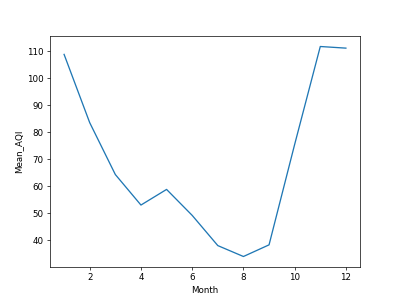

In [84]:
by_year = city_data.groupby([city_data.Date.dt.year]).mean()
by_month = city_data.groupby([city_data.Date.dt.month]).mean()

plt.figure()
plt.xlabel('Month')
plt.ylabel('Mean_AQI')
plt.plot(by_month.index.get_level_values(0),by_month['PM2.5'])

<IPython.core.display.Javascript object>


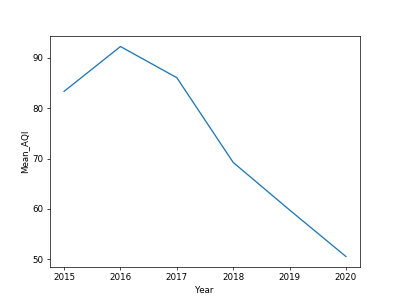

In [85]:
plt.figure()
plt.xlabel('Year')
plt.ylabel('Mean_AQI')
plt.plot(by_year.index.get_level_values(0),by_year['PM2.5']) #Ignore 2020 as data is whole year data is not yet available.

In [86]:
city_data_not_2020 = city_data[city_data.Date.dt.year != 2020]

In [87]:
by_month_not_2020 = city_data_not_2020.groupby([city_data_not_2020.Date.dt.month]).mean()

<IPython.core.display.Javascript object>


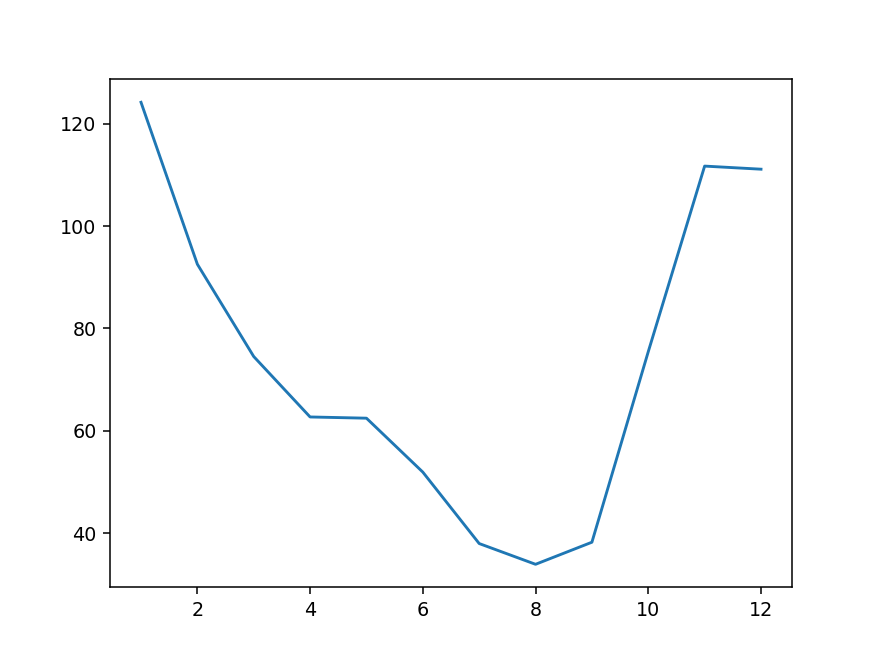

In [88]:
plt.figure()
plt.plot(by_month_not_2020.index.get_level_values(0),by_month_not_2020['PM2.5']) 
#Data in march,April is higher as it was brought down by 2020 in previous graph.

As we can see all over the India the trend of PM2.5 levels going down from June to September which are generally the months of Monsoon.

<IPython.core.display.Javascript object>


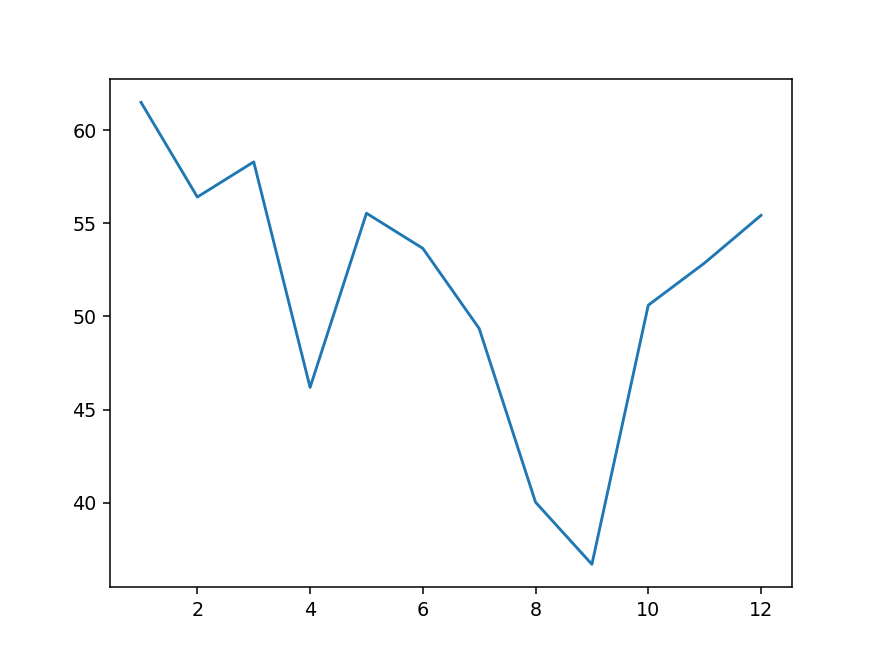

In [89]:
plt.figure()
plt.plot(city_data[city_data.City=='Chennai'].groupby([city_data.Date.dt.month]).mean().index.get_level_values(0),city_data[city_data.City=='Chennai'].groupby([city_data.Date.dt.month]).mean()['PM2.5'])

<IPython.core.display.Javascript object>


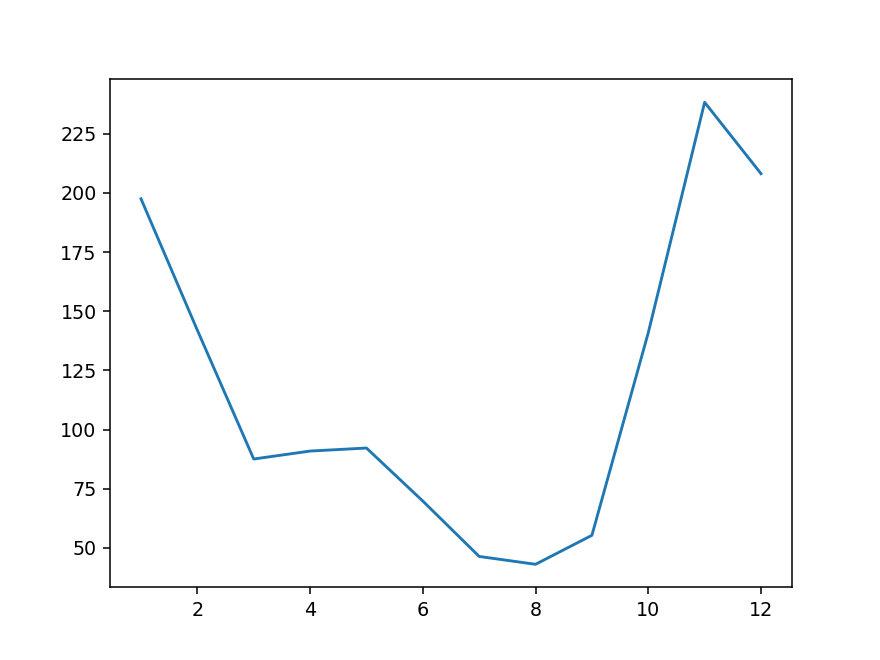

In [90]:
plt.figure()
plt.plot(city_data[city_data.City=='Delhi'].groupby([city_data.Date.dt.month]).mean().index.get_level_values(0),city_data[city_data.City=='Delhi'].groupby([city_data.Date.dt.month]).mean()['PM2.5'])

<IPython.core.display.Javascript object>


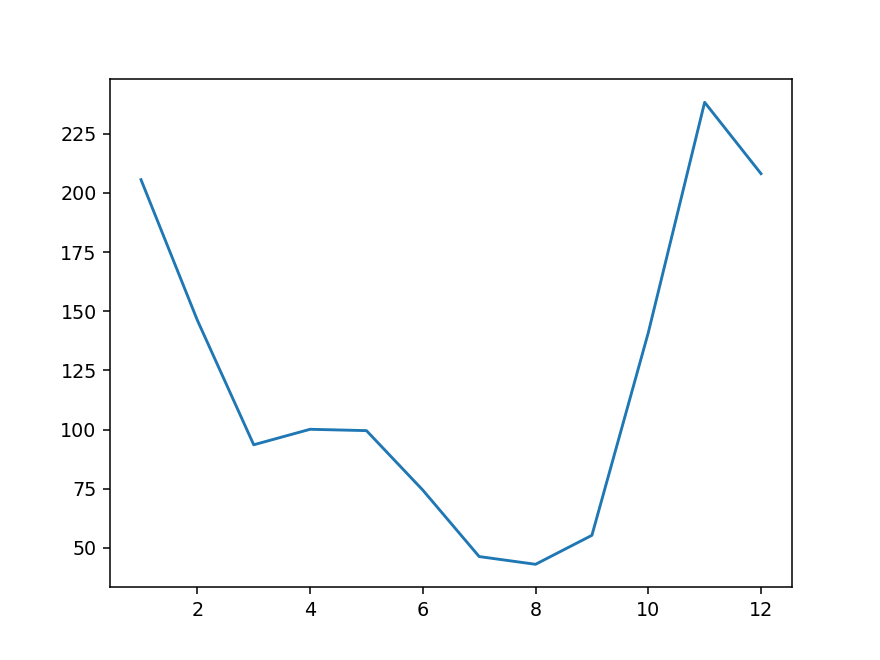

In [91]:
plt.figure()
plt.plot(city_data_not_2020[city_data_not_2020.City=='Delhi'].groupby([city_data_not_2020.Date.dt.month]).mean().index.get_level_values(0),city_data_not_2020[city_data_not_2020.City=='Delhi'].groupby([city_data_not_2020.Date.dt.month]).mean()['PM2.5'])

<IPython.core.display.Javascript object>


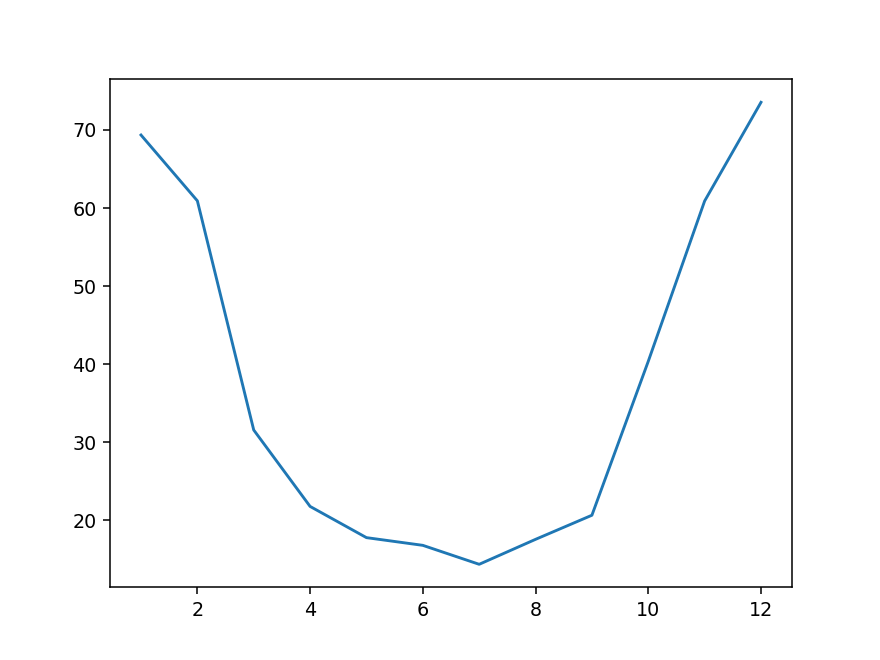

In [92]:
plt.figure()
plt.plot(city_data[city_data.City=='Mumbai'].groupby([city_data.Date.dt.month]).mean().index.get_level_values(0),city_data[city_data.City=='Mumbai'].groupby([city_data.Date.dt.month]).mean()['PM2.5'])

<IPython.core.display.Javascript object>


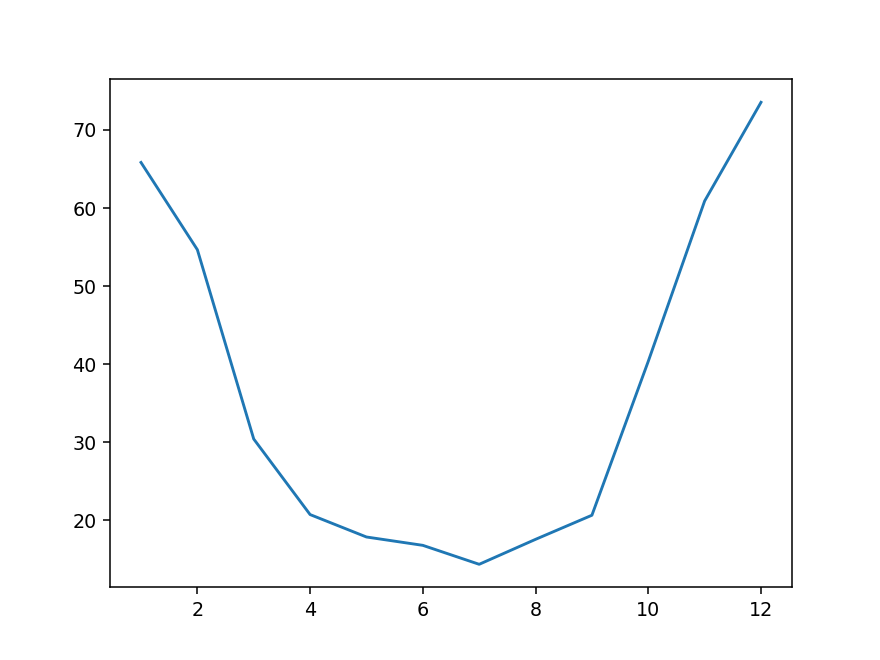

In [93]:
plt.figure()
plt.plot(city_data_not_2020[city_data_not_2020.City=='Mumbai'].groupby([city_data_not_2020.Date.dt.month]).mean().index.get_level_values(0),city_data_not_2020[city_data_not_2020.City=='Mumbai'].groupby([city_data_not_2020.Date.dt.month]).mean()['PM2.5'])

The Monsoon clearly has effect on PM2.5 as in Delhi and Mumbai, as monsoon is mostly in June, July, August and September (6,7,8,9) PM 2.5 goes way down.  
Whereas in Chennai where monsoon is far after than these cities, has relatively high PM2.5 in June, July and starts dropping after these months.

### CO - Carbon monoxide

<IPython.core.display.Javascript object>


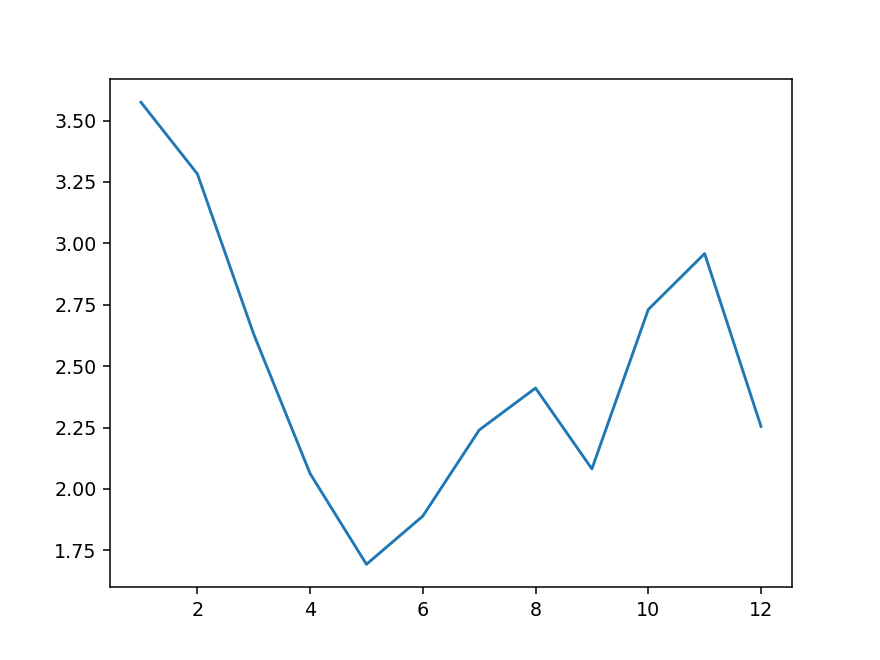

In [95]:
plt.figure()
plt.plot(city_data_not_2020.groupby([city_data_not_2020.Date.dt.month]).mean().index.get_level_values(0),city_data_not_2020.groupby([city_data_not_2020.Date.dt.month]).mean()['CO'])

<IPython.core.display.Javascript object>


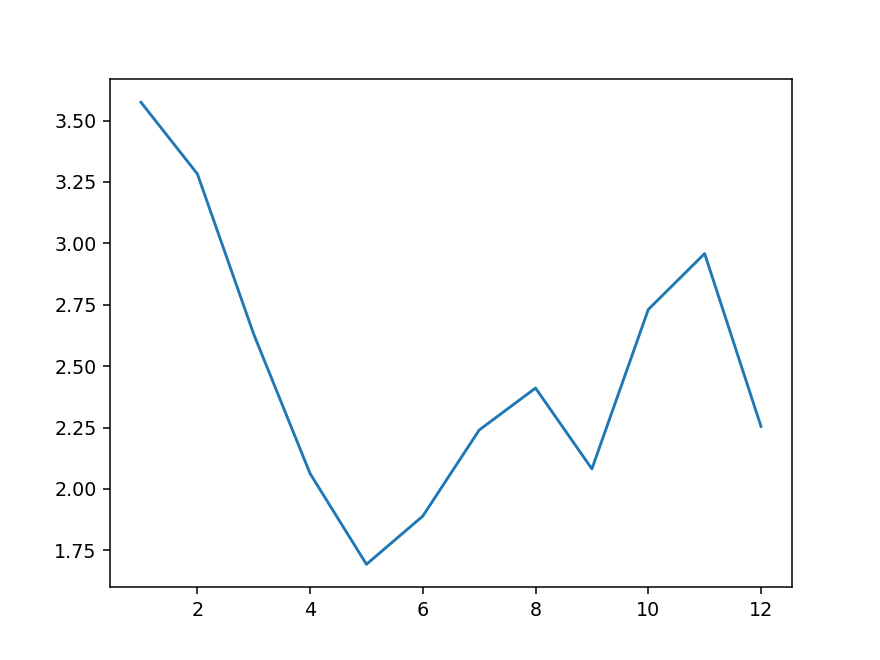

In [96]:
plt.figure()
plt.plot(city_data_not_2020.groupby([city_data_not_2020.Date.dt.month]).mean().index.get_level_values(0),city_data_not_2020.groupby([city_data_not_2020.Date.dt.month]).mean()['CO'])

<IPython.core.display.Javascript object>


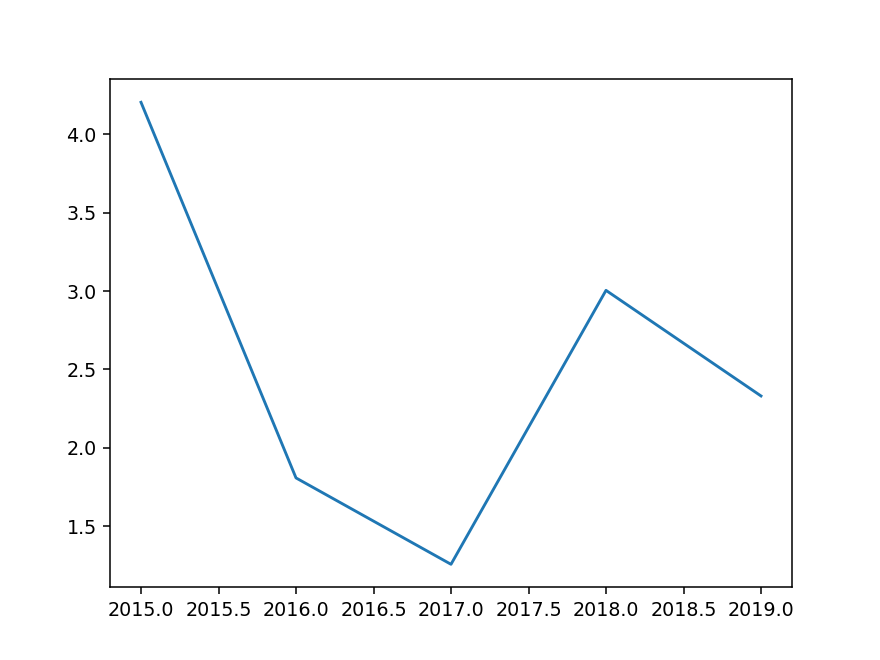

In [98]:
plt.figure()
plt.plot(city_data_not_2020.groupby([city_data_not_2020.Date.dt.year]).mean().index.get_level_values(0),city_data_not_2020.groupby([city_data_not_2020.Date.dt.year]).mean()['CO'])

In [99]:
city_data_not_2020.groupby([city_data_not_2020.Date.dt.year]).mean()['CO']

Date
2015    4.205297
2016    1.807855
2017    1.256459
2018    3.004921
2019    2.330879
Name: CO, dtype: float64

<IPython.core.display.Javascript object>


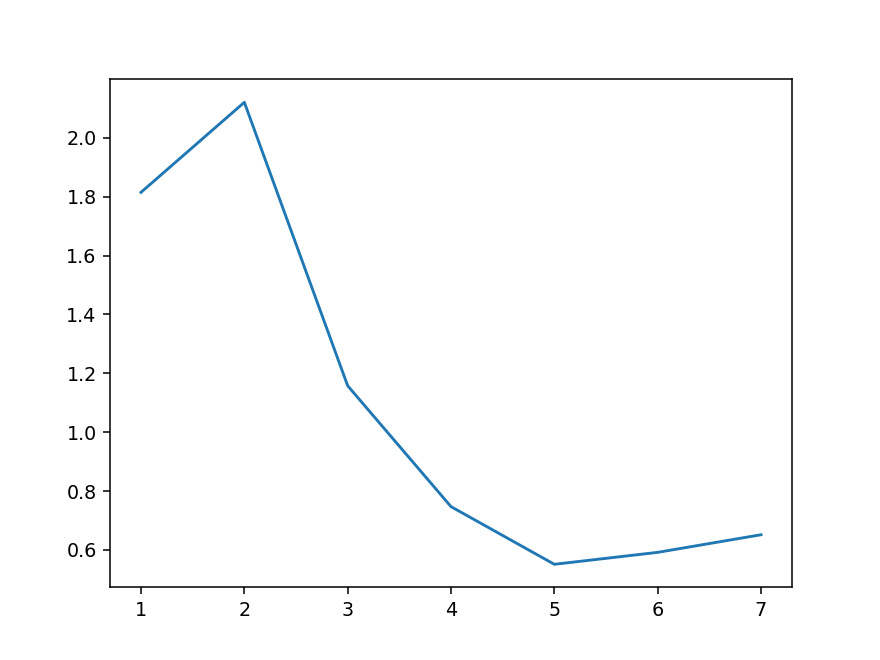

In [100]:
plt.figure()
plt.plot(city_data[city_data.Date.dt.year==2020].groupby([city_data.Date.dt.month]).mean().index.get_level_values(0),city_data[city_data.Date.dt.year==2020].groupby([city_data.Date.dt.month]).mean()['CO'])

<IPython.core.display.Javascript object>


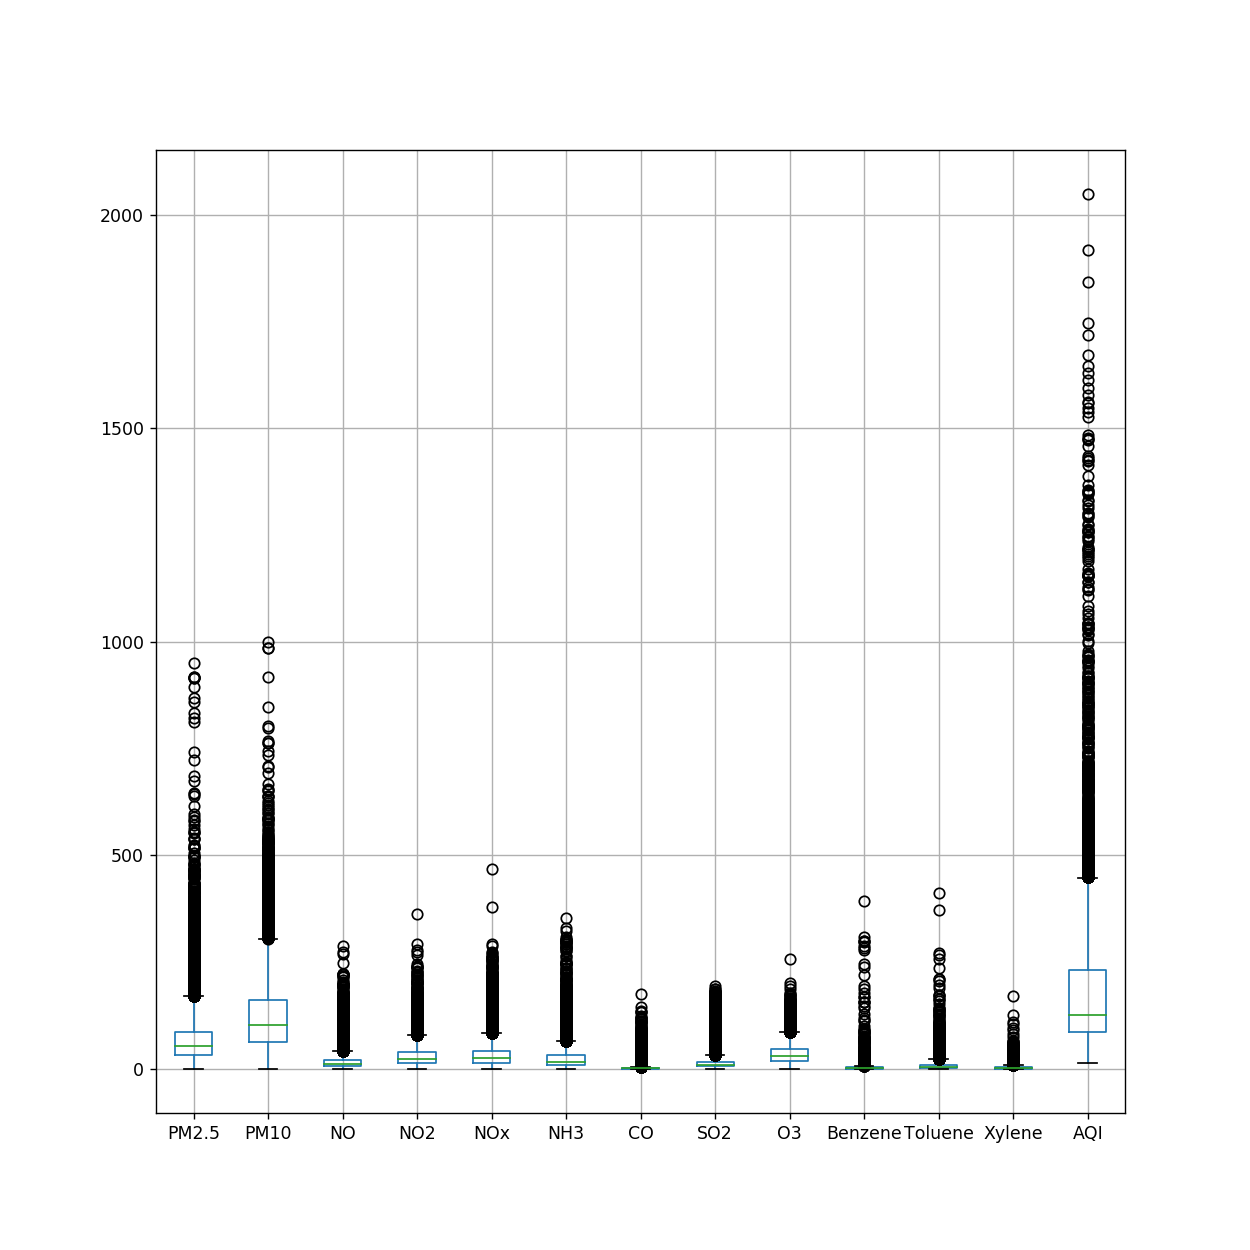

In [104]:
plt.figure(figsize=(10,10))
city_data_not_2020.boxplot()

## Difference in three months February, March and April 2020 in Mumbai, Delhi and Chennai.

###  Mumbai

<IPython.core.display.Javascript object>


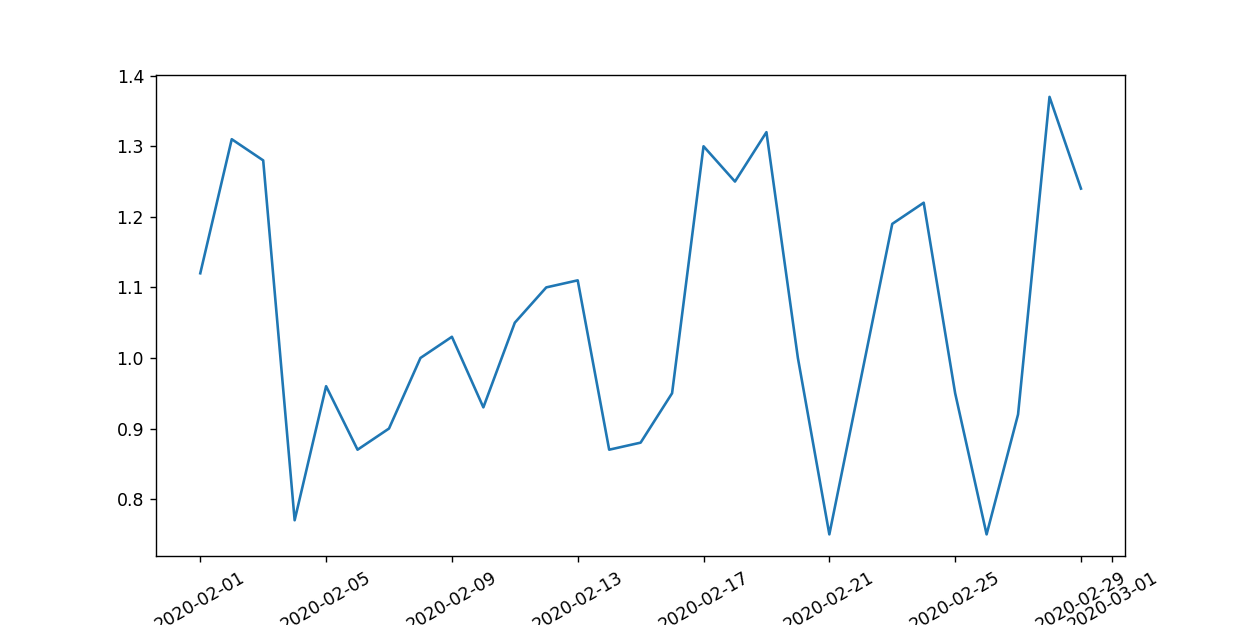

(array([737456., 737460., 737464., 737468., 737472., 737476., 737480.,
        737484., 737485.]),
 <a list of 9 Text xticklabel objects>)

In [117]:
plt.figure(figsize=(10, 5))
plt.plot(city_data[(city_data.Date.dt.month==2)&(city_data.Date.dt.year==2020)&(city_data.City=='Mumbai')]['Date'],city_data[(city_data.Date.dt.month==2)&(city_data.Date.dt.year==2020)&(city_data.City=='Mumbai')]['CO'])
plt.xticks(rotation=30)

<IPython.core.display.Javascript object>


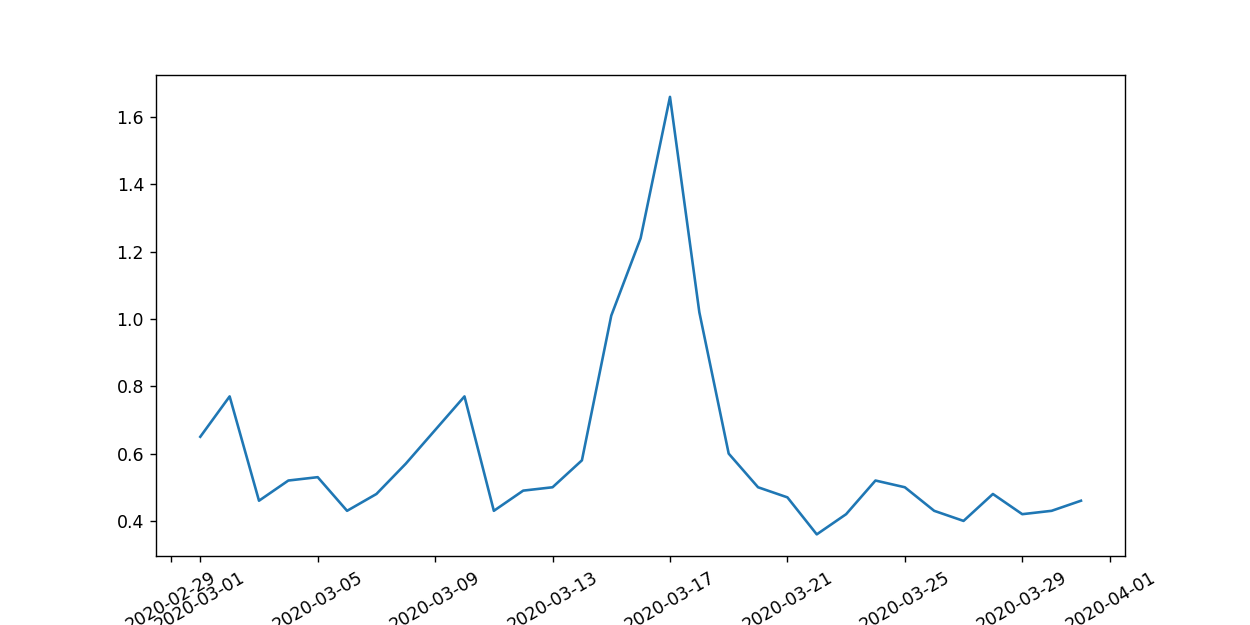

(array([737484., 737485., 737489., 737493., 737497., 737501., 737505.,
        737509., 737513., 737516.]),
 <a list of 10 Text xticklabel objects>)

In [118]:
plt.figure(figsize=(10, 5))
plt.plot(city_data[(city_data.Date.dt.month==3)&(city_data.Date.dt.year==2020)&(city_data.City=='Mumbai')]['Date'],city_data[(city_data.Date.dt.month==3)&(city_data.Date.dt.year==2020)&(city_data.City=='Mumbai')]['CO'])
plt.xticks(rotation=30)

<IPython.core.display.Javascript object>


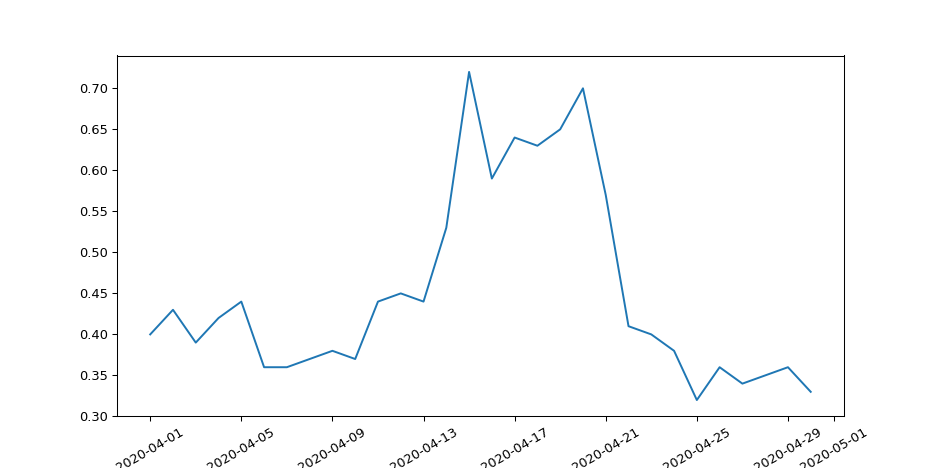

(array([737516., 737520., 737524., 737528., 737532., 737536., 737540.,
        737544., 737546.]),
 <a list of 9 Text xticklabel objects>)

In [119]:
plt.figure(figsize=(10,5))
plt.plot(city_data[(city_data.Date.dt.month==4)&(city_data.Date.dt.year==2020)&(city_data.City=='Mumbai')]['Date'],city_data[(city_data.Date.dt.month==4)&(city_data.Date.dt.year==2020)&(city_data.City=='Mumbai')]['CO'])
plt.xticks(rotation=30)

In [124]:
Mean_co_for_Mumbai_Feb_2020 = city_data[(city_data.Date.dt.month==2) & 
                                        (city_data.Date.dt.year==2020) & 
                                        (city_data.City=='Mumbai')]['CO'].mean()

Mean_co_for_Mumbai_March_2020 = city_data[(city_data.Date.dt.month==3) & 
                                          (city_data.Date.dt.year==2020) & 
                                          (city_data.City=='Mumbai')]['CO'].mean()

Mean_co_for_Mumbai_April_2020 = city_data[(city_data.Date.dt.month==4) & 
                                          (city_data.Date.dt.year==2020) & 
                                          (city_data.City=='Mumbai')]['CO'].mean()


print('Mean Carbon oxide in Feb 2020 in Mumbai', Mean_co_for_Mumbai_Feb_2020)
print('Mean Carbon oxide in March 2020 in Mumbai', Mean_co_for_Mumbai_March_2020)
print('Mean Carbon oxide in April 2020 in Mumbai', Mean_co_for_Mumbai_April_2020)

Mean Carbon oxide in Feb 2020 in Mumbai 1.046896551724138
Mean Carbon oxide in March 2020 in Mumbai 0.6054838709677419
Mean Carbon oxide in April 2020 in Mumbai 0.451


### Delhi

<IPython.core.display.Javascript object>


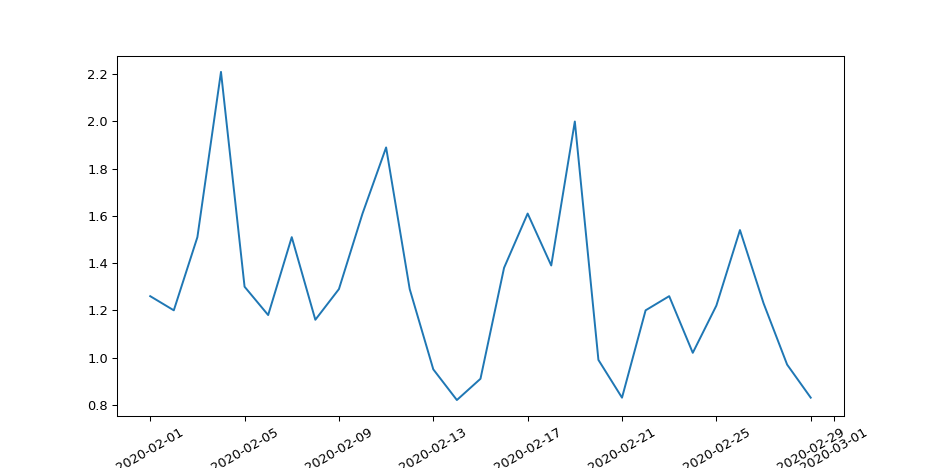

(array([737456., 737460., 737464., 737468., 737472., 737476., 737480.,
        737484., 737485.]),
 <a list of 9 Text xticklabel objects>)

In [125]:
plt.figure(figsize=(10,5))
plt.plot(city_data[(city_data.Date.dt.month==2)&(city_data.Date.dt.year==2020)&(city_data.City=='Delhi')]['Date'],city_data[(city_data.Date.dt.month==2) & 
                                                                                                                            (city_data.Date.dt.year==2020) & 
                                                                                                                            (city_data.City=='Delhi')]['CO'])
plt.xticks(rotation=30)

<IPython.core.display.Javascript object>


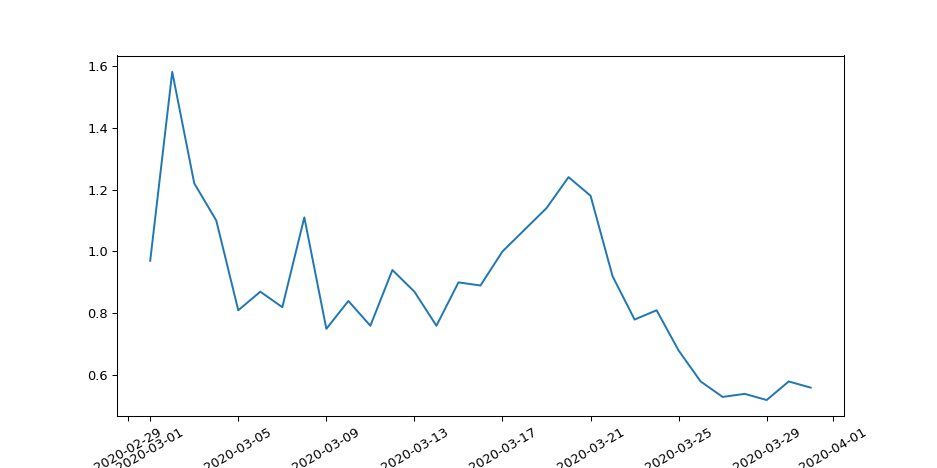

(array([737484., 737485., 737489., 737493., 737497., 737501., 737505.,
        737509., 737513., 737516.]),
 <a list of 10 Text xticklabel objects>)

In [126]:
plt.figure(figsize=(10,5))
plt.plot(city_data[(city_data.Date.dt.month==3)&(city_data.Date.dt.year==2020)&(city_data.City=='Delhi')]['Date'],city_data[(city_data.Date.dt.month==3)&(city_data.Date.dt.year==2020)&(city_data.City=='Delhi')]['CO'])
plt.xticks(rotation=30)

<IPython.core.display.Javascript object>


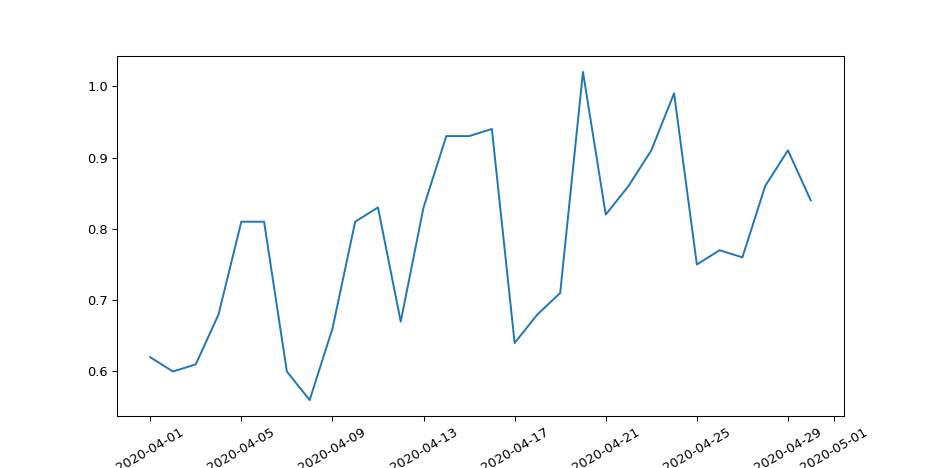

(array([737516., 737520., 737524., 737528., 737532., 737536., 737540.,
        737544., 737546.]),
 <a list of 9 Text xticklabel objects>)

In [127]:
plt.figure(figsize=(10,5))
plt.plot(city_data[(city_data.Date.dt.month==4)&(city_data.Date.dt.year==2020)&(city_data.City=='Delhi')]['Date'],city_data[(city_data.Date.dt.month==4)&(city_data.Date.dt.year==2020)&(city_data.City=='Delhi')]['CO'])
plt.xticks(rotation=30)

In [128]:
Mean_co_for_Delhi_Feb_2020 = city_data[(city_data.Date.dt.month==2) & 
                                       (city_data.Date.dt.year==2020) & 
                                       (city_data.City=='Delhi')]['CO'].mean()

Mean_co_for_Delhi_March_2020 = city_data[(city_data.Date.dt.month==3) & 
                                         (city_data.Date.dt.year==2020) & 
                                         (city_data.City=='Delhi')]['CO'].mean()

Mean_co_for_Delhi_April_2020 = city_data[(city_data.Date.dt.month==4) & 
                                         (city_data.Date.dt.year==2020) & 
                                         (city_data.City=='Delhi')]['CO'].mean()


print('Mean Carbon oxide in Feb 2020 in Delhi',Mean_co_for_Delhi_Feb_2020)
print('Mean Carbon oxide in March 2020 in Delhi',Mean_co_for_Delhi_March_2020)
print('Mean Carbon oxide in April 2020 in Delhi',Mean_co_for_Delhi_April_2020)

Mean Carbon oxide in Feb 2020 in Delhi 1.295172413793103
Mean Carbon oxide in March 2020 in Delhi 0.881290322580645
Mean Carbon oxide in April 2020 in Delhi 0.7803333333333333


### Chennai

<IPython.core.display.Javascript object>


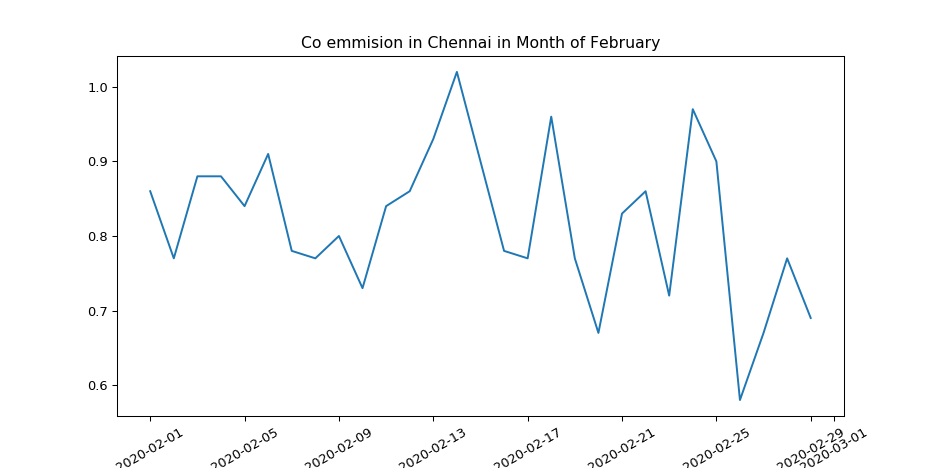

(array([737456., 737460., 737464., 737468., 737472., 737476., 737480.,
        737484., 737485.]),
 <a list of 9 Text xticklabel objects>)

In [129]:
plt.figure(figsize=(10,5))
plt.title('Co emmision in Chennai in Month of February')
plt.plot(city_data[(city_data.Date.dt.month==2)&(city_data.Date.dt.year==2020)&(city_data.City=='Chennai')]['Date'],city_data[(city_data.Date.dt.month==2)&(city_data.Date.dt.year==2020)&(city_data.City=='Chennai')]['CO'])
plt.xticks(rotation=30)

C:\Users\Vivek\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


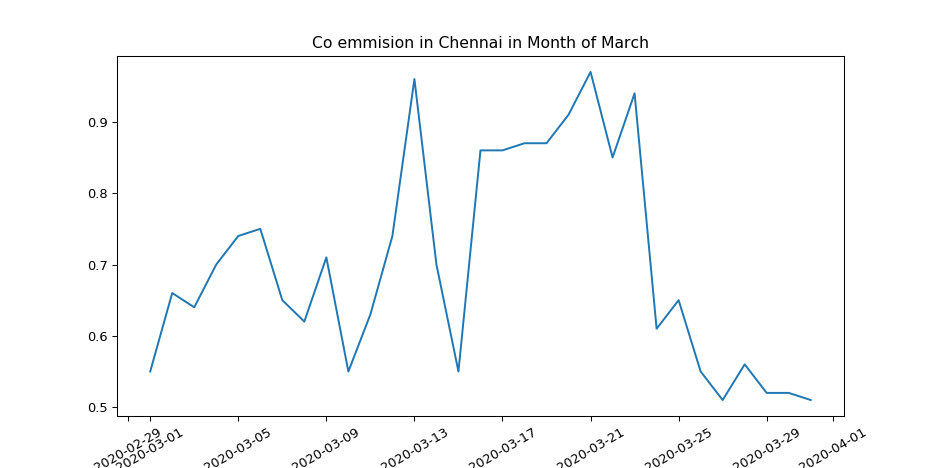

(array([737484., 737485., 737489., 737493., 737497., 737501., 737505.,
        737509., 737513., 737516.]),
 <a list of 10 Text xticklabel objects>)

In [131]:
plt.figure(figsize=(10,5))
plt.title('Co emmision in Chennai in Month of March')
plt.plot(city_data[(city_data.Date.dt.month==3)&(city_data.Date.dt.year==2020)&(city_data.City=='Chennai')]['Date'],city_data[(city_data.Date.dt.month==3)&(city_data.Date.dt.year==2020)&(city_data.City=='Chennai')]['CO'])
plt.xticks(rotation=30)

C:\Users\Vivek\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


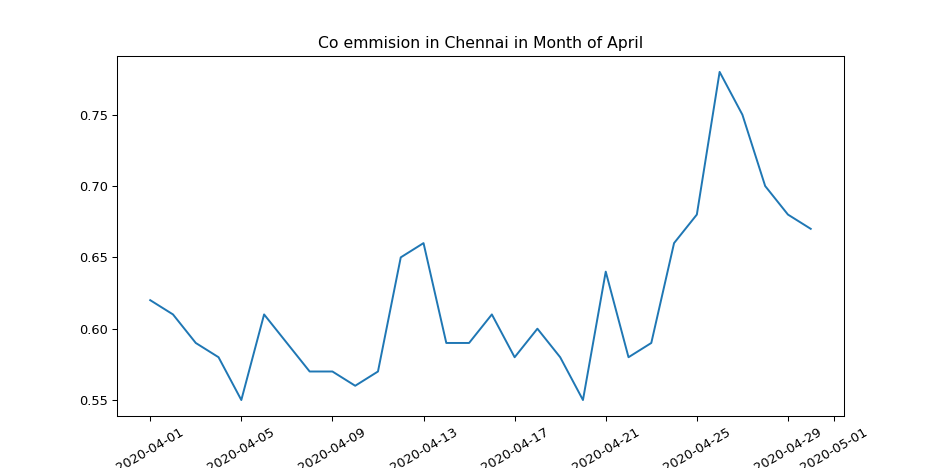

(array([737516., 737520., 737524., 737528., 737532., 737536., 737540.,
        737544., 737546.]),
 <a list of 9 Text xticklabel objects>)

In [132]:
plt.figure(figsize=(10,5))
plt.title('Co emmision in Chennai in Month of April')
plt.plot(city_data[(city_data.Date.dt.month==4)&(city_data.Date.dt.year==2020)&(city_data.City=='Chennai')]['Date'],city_data[(city_data.Date.dt.month==4)&(city_data.Date.dt.year==2020)&(city_data.City=='Chennai')]['CO'])
plt.xticks(rotation=30)

In [133]:
Mean_co_for_Chennai_Feb_2020 = city_data[(city_data.Date.dt.month==2) & 
                                         (city_data.Date.dt.year==2020) & 
                                         (city_data.City=='Chennai')]['CO'].mean()

Mean_co_for_Chennai_March_2020 = city_data[(city_data.Date.dt.month==3) & 
                                           (city_data.Date.dt.year==2020) & 
                                           (city_data.City=='Chennai')]['CO'].mean()

Mean_co_for_Chennai_April_2020 = city_data[(city_data.Date.dt.month==4) & 
                                           (city_data.Date.dt.year==2020) & 
                                           (city_data.City=='Chennai')]['CO'].mean()


print('Mean Carbon oxide in Feb 2020 in Chennai',Mean_co_for_Chennai_Feb_2020)
print('Mean Carbon oxide in March 2020 in Chennai',Mean_co_for_Chennai_March_2020)
print('Mean Carbon oxide in April 2020 in Chennai',Mean_co_for_Chennai_April_2020)

Mean Carbon oxide in Feb 2020 in Chennai 0.8175862068965515
Mean Carbon oxide in March 2020 in Chennai 0.7003225806451613
Mean Carbon oxide in April 2020 in Chennai 0.6186666666666667


In [138]:
Mean_co_in_Feb_March_April_2020=pd.DataFrame()
for i in city_data.City.unique():
    if i!='Ahmedabad':
        Mean_co_in_Feb_March_April_2020[i]=[city_data[(city_data.Date.dt.month==2)&
                                                      (city_data.Date.dt.year==2020)&
                                                      (city_data.City==i)]['CO'].mean(),
                                            city_data[(city_data.Date.dt.month==3)&
                                                      (city_data.Date.dt.year==2020)&
                                                      (city_data.City==i)]['CO'].mean(),
                                            city_data[(city_data.Date.dt.month==4)&
                                                      (city_data.Date.dt.year==2020)&
                                                      (city_data.City==i)]['CO'].mean()]

<IPython.core.display.Javascript object>


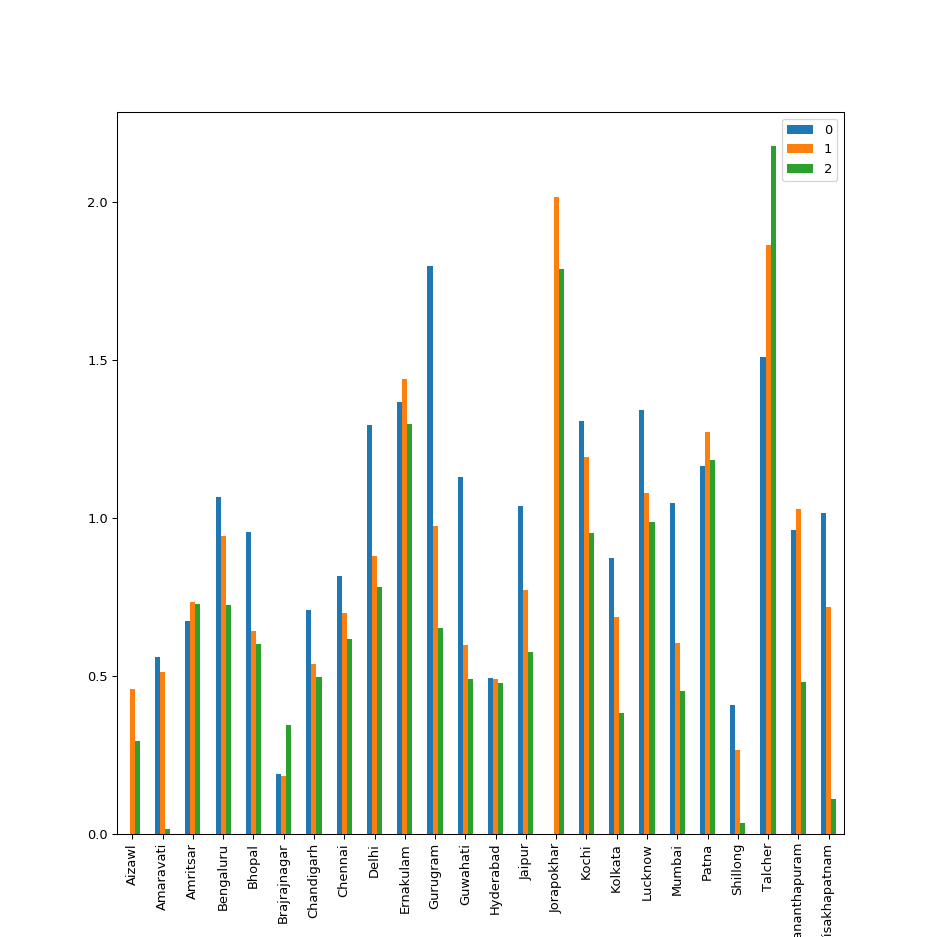

In [139]:
Mean_co_in_Feb_March_April_2020.transpose().plot(figsize=(10,10),kind='bar')

We can see the trend of mean of carbon monoxide emission for 3 months feb, march and april of 2020 is going down. This trend we can mostly see by large margins in the dense populated cities and famous tourist destinations. One city is different about it and that is Talcher. It is showing eactly opposite trend that of populated cities. Let's see if we can find more about past emissions in the city of coal mining, Talcher.

In [140]:
city_data[city_data.City=='Talcher'].isnull().sum()/len(city_data[city_data.City=='Talcher']) 
# Missing values related to CO is about 16% in whole dataset

City          0.000000
Date          0.000000
PM2.5         0.201389
PM10          0.196759
NO            0.210648
NO2           0.236111
NOx           0.170139
NH3           0.188657
CO            0.160880
SO2           0.207176
O3            0.156250
Benzene       0.268519
Toluene       0.806713
Xylene        1.000000
AQI           0.244213
AQI_Bucket    0.244213
dtype: float64

In [141]:
city_data[(city_data.City=='Talcher')&(city_data.Date.dt.year==2019)].isnull().sum() 
# About 15 values are missing in year 2019 in record of CO.
# This is small value so it won't affect our mean much.

City            0
Date            0
PM2.5          26
PM10           36
NO             17
NO2            64
NOx            15
NH3            39
CO             15
SO2            19
O3             15
Benzene        19
Toluene       365
Xylene        365
AQI            62
AQI_Bucket     62
dtype: int64

C:\Users\Vivek\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


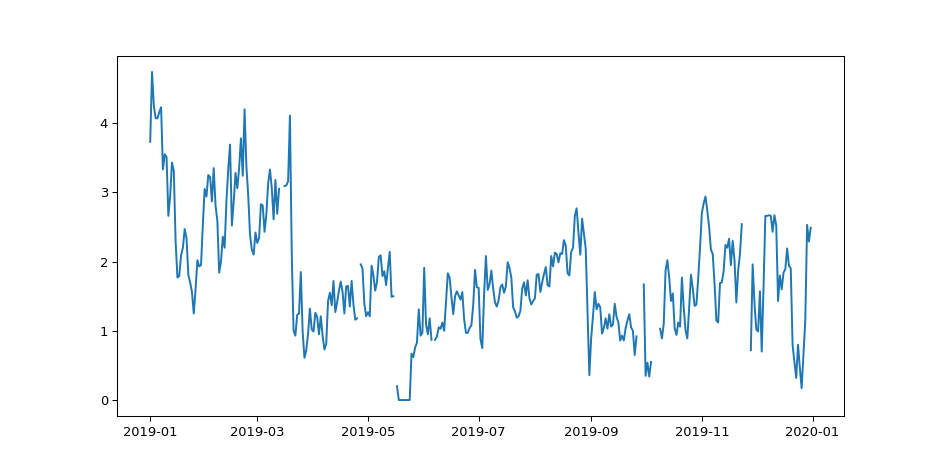

In [142]:
plt.figure(figsize=(10,5))
plt.plot(city_data[(city_data.City=='Talcher')&(city_data.Date.dt.year==2019)]['Date'],city_data[(city_data.City=='Talcher')&(city_data.Date.dt.year==2019)]['CO'])

In [143]:
city_data[(city_data.City=='Talcher')&(city_data.Date.dt.year==2019)]['CO'].mean()

1.7640857142857147

In [144]:
city_data[(city_data.City=='Talcher')&(city_data.Date.dt.year==2020)]['CO'].mean()

1.7984873949579838

Here the mean of carbon monoxide emission rate has not changed. Even this area has less population, it has its coal reserves so due to coal mines and not the vehicles, carbon monoxide emission rate is affected.   

So we can ignore this city and other two Brajrajnagar, Odisha.

## AQI

C:\Users\Vivek\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


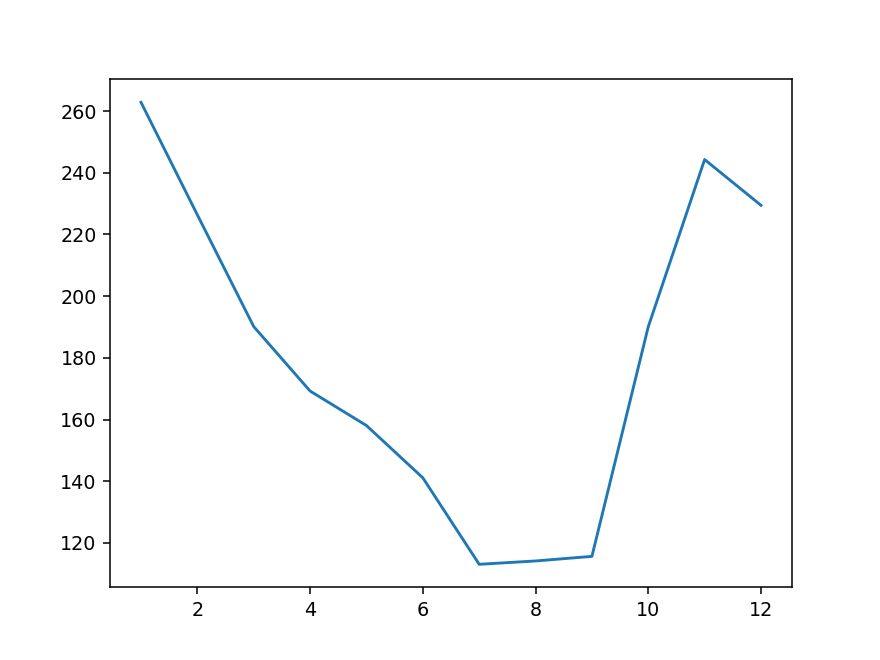

In [145]:
plt.figure()
plt.plot(city_data_not_2020.groupby([city_data_not_2020.Date.dt.month]).mean().index.get_level_values(0),city_data_not_2020.groupby([city_data_not_2020.Date.dt.month]).mean()['AQI'])

In [146]:
Mean_AQI_in_Feb_March_April_2020=pd.DataFrame()
for i in city_data.City.unique():
    if i!='Ahmedabad':
        Mean_AQI_in_Feb_March_April_2020[i]=[city_data[(city_data.Date.dt.month==2)&(city_data.Date.dt.year==2020)&(city_data.City==i)]['AQI'].mean(),city_data[(city_data.Date.dt.month==3)&(city_data.Date.dt.year==2020)&(city_data.City==i)]['AQI'].mean(),city_data[(city_data.Date.dt.month==4)&(city_data.Date.dt.year==2020)&(city_data.City==i)]['AQI'].mean()]

<IPython.core.display.Javascript object>


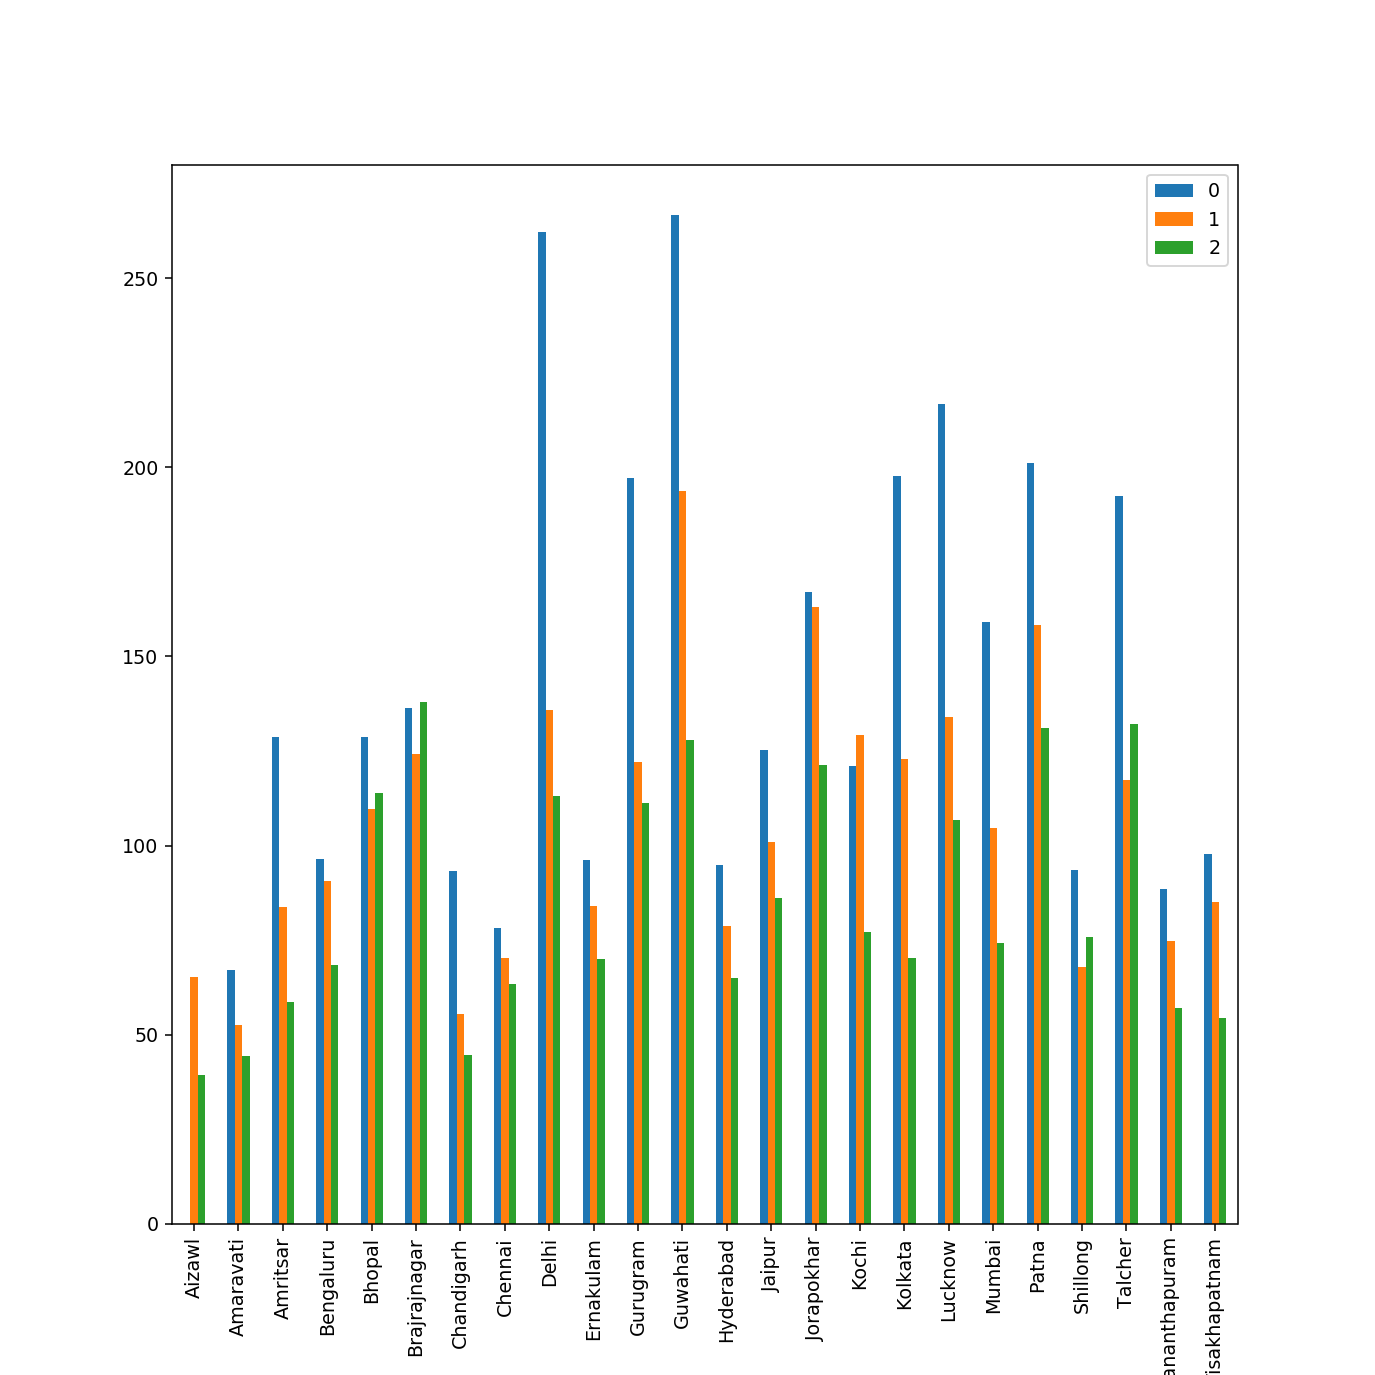

In [149]:
Mean_AQI_in_Feb_March_April_2020.transpose().plot(figsize=(10, 10),kind='bar')

<IPython.core.display.Javascript object>


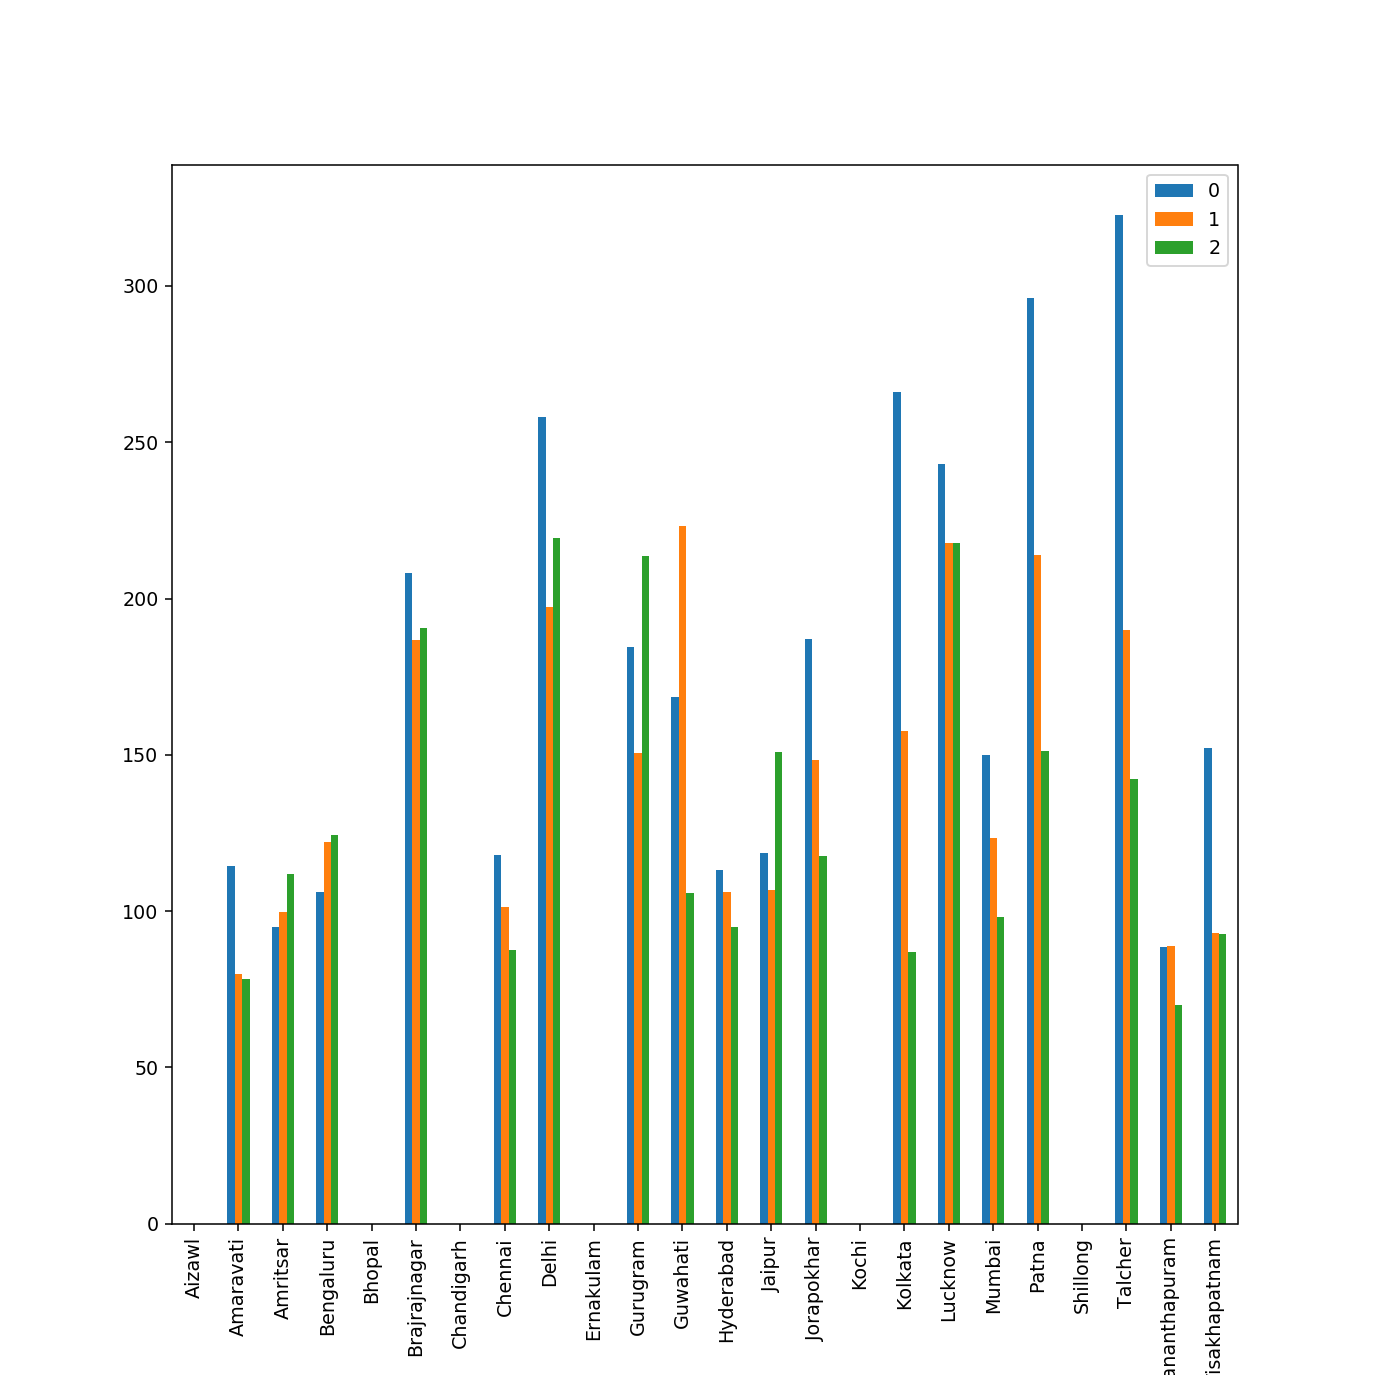

In [150]:
Mean_AQI_in_Feb_March_April_2019=pd.DataFrame()
for i in city_data.City.unique():
    if i!='Ahmedabad':
        Mean_AQI_in_Feb_March_April_2019[i]=[city_data[(city_data.Date.dt.month==2)&(city_data.Date.dt.year==2019)&(city_data.City==i)]['AQI'].mean(),city_data[(city_data.Date.dt.month==3)&(city_data.Date.dt.year==2019)&(city_data.City==i)]['AQI'].mean(),city_data[(city_data.Date.dt.month==4)&(city_data.Date.dt.year==2019)&(city_data.City==i)]['AQI'].mean()]
Mean_AQI_in_Feb_March_April_2019.transpose().plot(figsize=(10,10),kind='bar')

C:\Users\Vivek\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


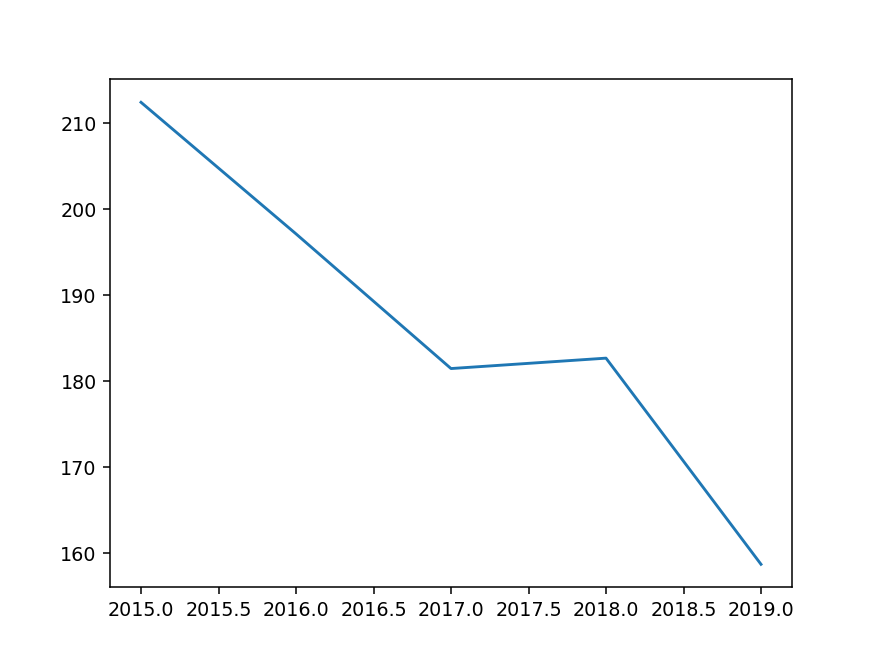

In [151]:
plt.figure()
plt.plot(city_data[city_data.Date.dt.year!=2020].groupby([city_data.Date.dt.year]).mean().index.get_level_values(0),city_data[city_data.Date.dt.year!=2020].groupby([city_data.Date.dt.year]).mean()['AQI'])

C:\Users\Vivek\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


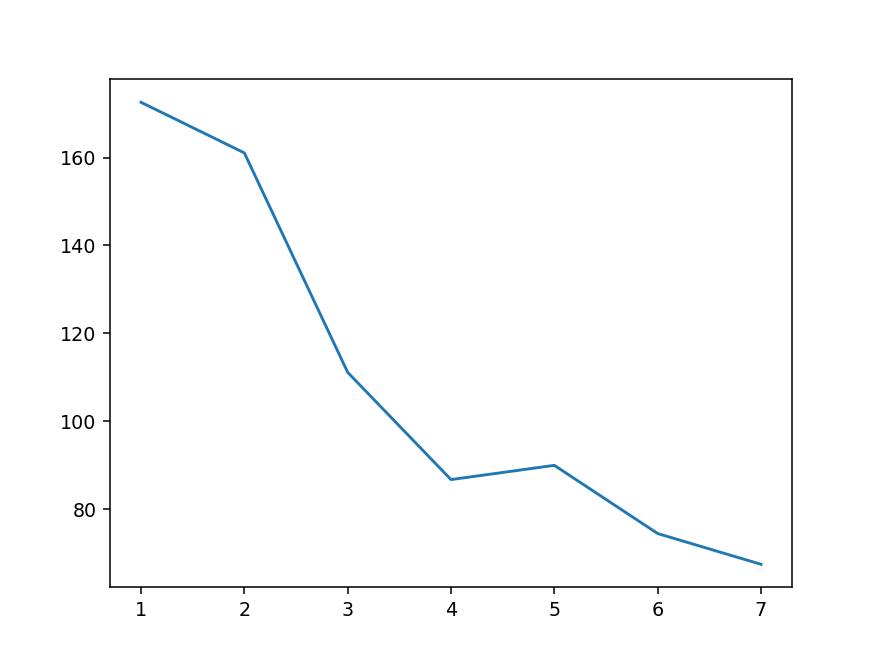

In [152]:
plt.figure()
plt.plot(city_data[city_data.Date.dt.year==2020].groupby([city_data.Date.dt.month]).mean().index.get_level_values(0),city_data[city_data.Date.dt.year==2020].groupby([city_data.Date.dt.month]).mean()['AQI'])

AQI is dropping over the years.This might or might not be because the null values in previous three years.But if we see the 2018 and 2019 around only 11% and 4% data is missing and still we can see the downward flow of AQI. 

## NO - Nitrogen Oxide

In [153]:
Mean_no_in_Feb_March_April_2020=pd.DataFrame()
for i in city_data.City.unique():
    if i!='Ahmedabad':
        Mean_no_in_Feb_March_April_2020[i]=[city_data[(city_data.Date.dt.month==2)&(city_data.Date.dt.year==2020)&(city_data.City==i)]['NO'].mean(),city_data[(city_data.Date.dt.month==3)&(city_data.Date.dt.year==2020)&(city_data.City==i)]['NO'].mean(),city_data[(city_data.Date.dt.month==4)&(city_data.Date.dt.year==2020)&(city_data.City==i)]['NO'].mean()]

C:\Users\Vivek\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<IPython.core.display.Javascript object>


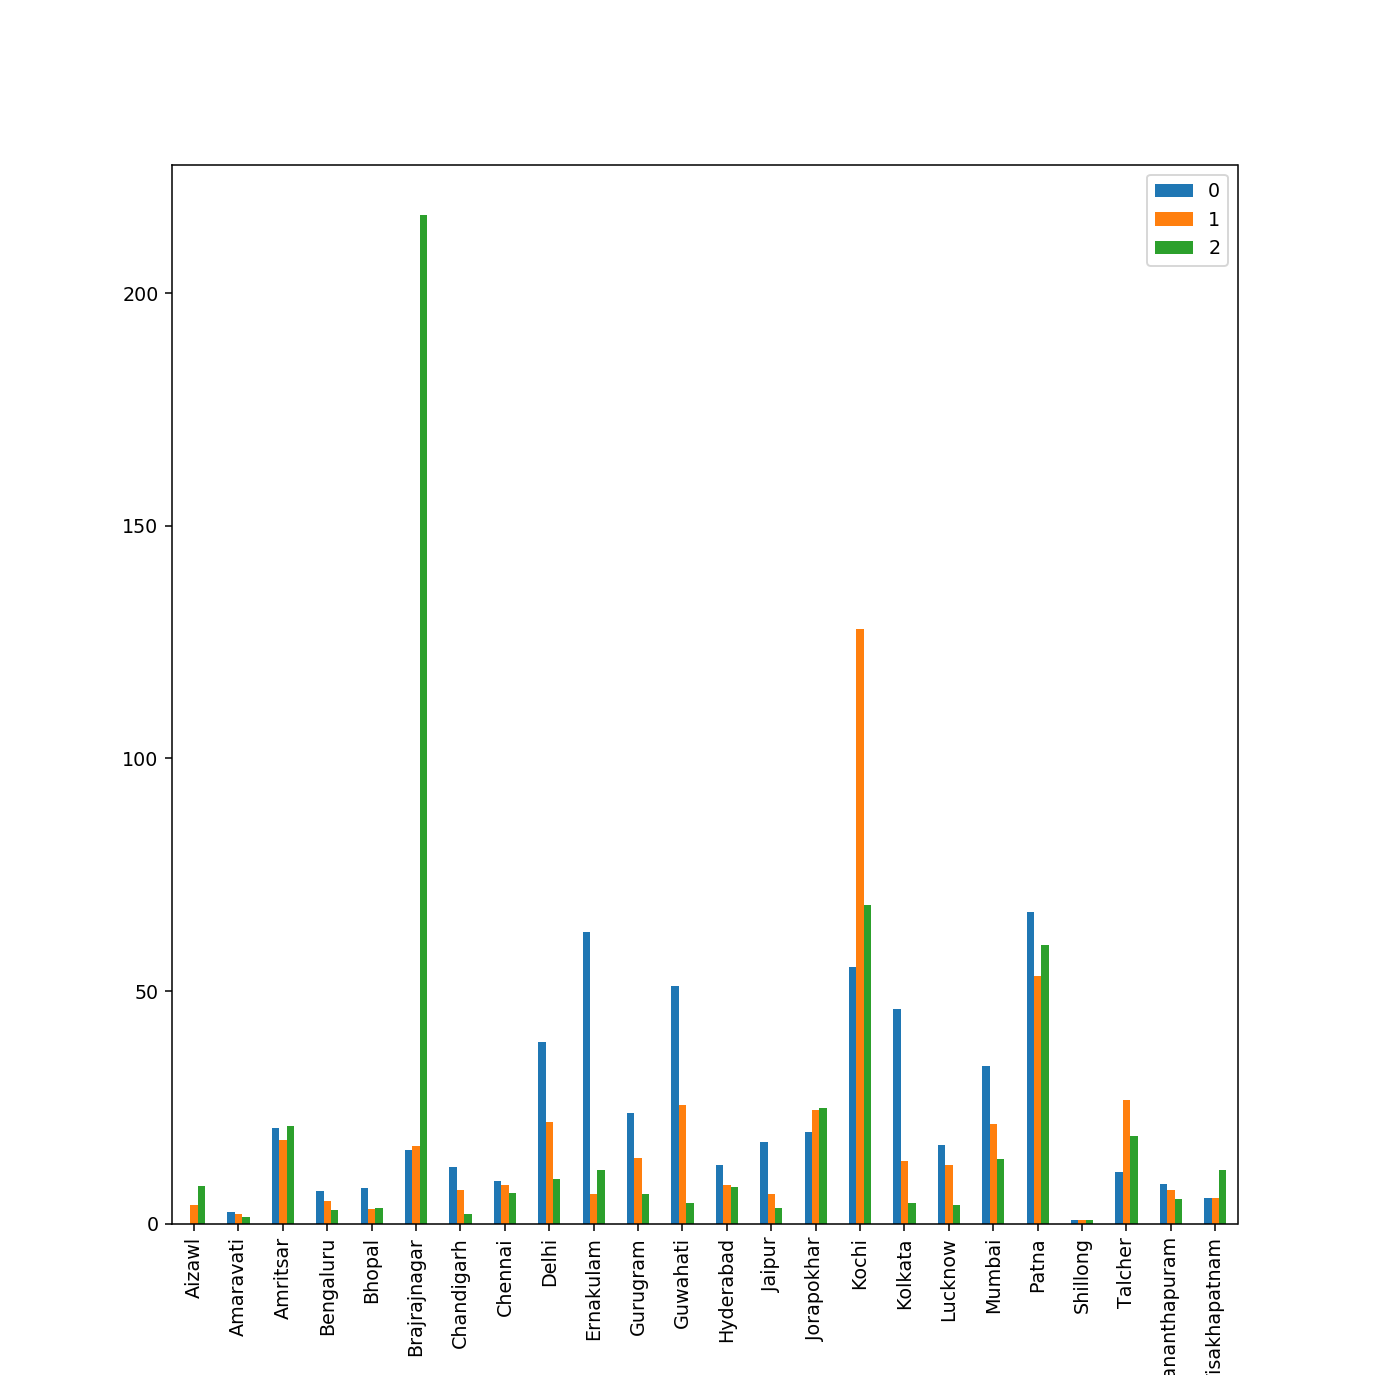

In [154]:
Mean_no_in_Feb_March_April_2020.transpose().plot(figsize=(10,10),kind='bar')

In [155]:
Mean_no_in_Feb_March_April_2019=pd.DataFrame()
for i in city_data.City.unique():
    if i!='Ahmedabad':
        Mean_no_in_Feb_March_April_2019[i]=[city_data[(city_data.Date.dt.month==2)&(city_data.Date.dt.year==2019)&(city_data.City==i)]['NO'].mean(),city_data[(city_data.Date.dt.month==3)&(city_data.Date.dt.year==2020)&(city_data.City==i)]['NO'].mean(),city_data[(city_data.Date.dt.month==4)&(city_data.Date.dt.year==2019)&(city_data.City==i)]['NO'].mean()]

<IPython.core.display.Javascript object>


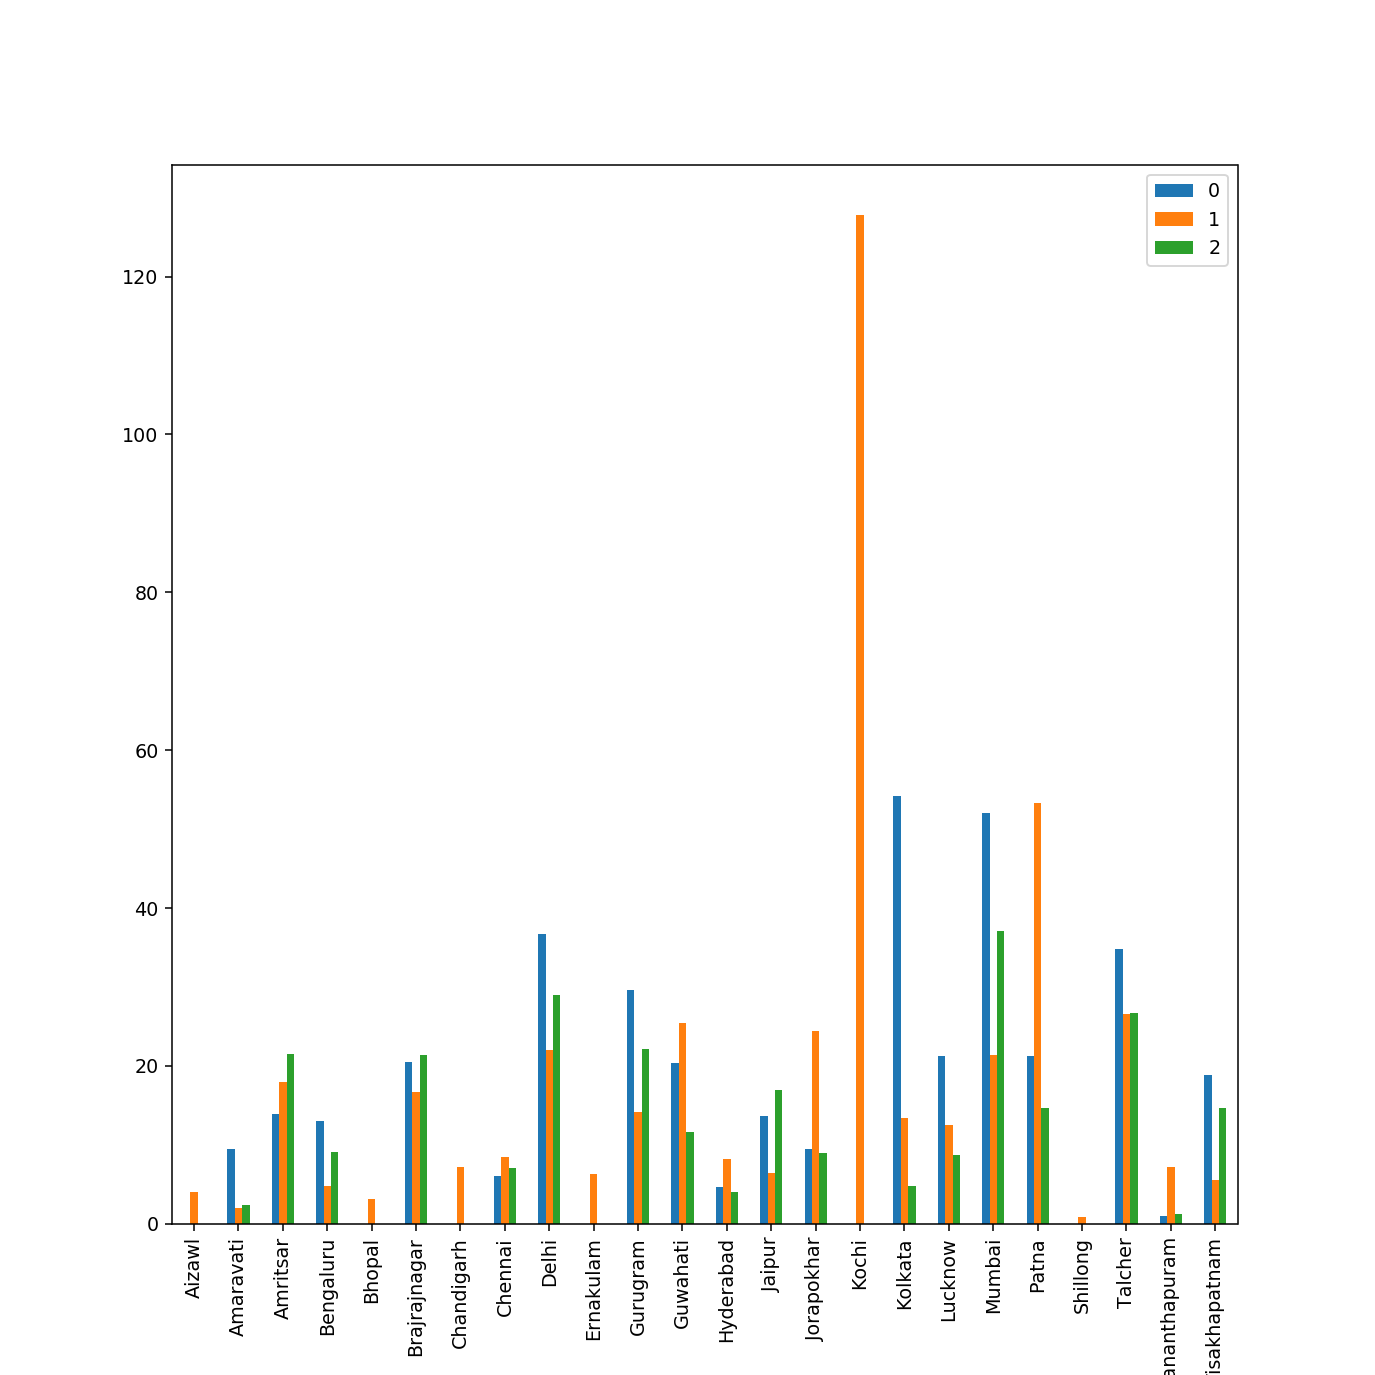

In [156]:
Mean_no_in_Feb_March_April_2019.transpose().plot(figsize=(10,10),kind='bar')

In [157]:
Mean_no_in_Feb_March_April_2018=pd.DataFrame()
for i in city_data.City.unique():
    if i!='Ahmedabad':
        Mean_no_in_Feb_March_April_2018[i]=[city_data[(city_data.Date.dt.month==2)&(city_data.Date.dt.year==2018)&(city_data.City==i)]['NO'].mean(),city_data[(city_data.Date.dt.month==3)&(city_data.Date.dt.year==2020)&(city_data.City==i)]['NO'].mean(),city_data[(city_data.Date.dt.month==4)&(city_data.Date.dt.year==2018)&(city_data.City==i)]['NO'].mean()]

<IPython.core.display.Javascript object>


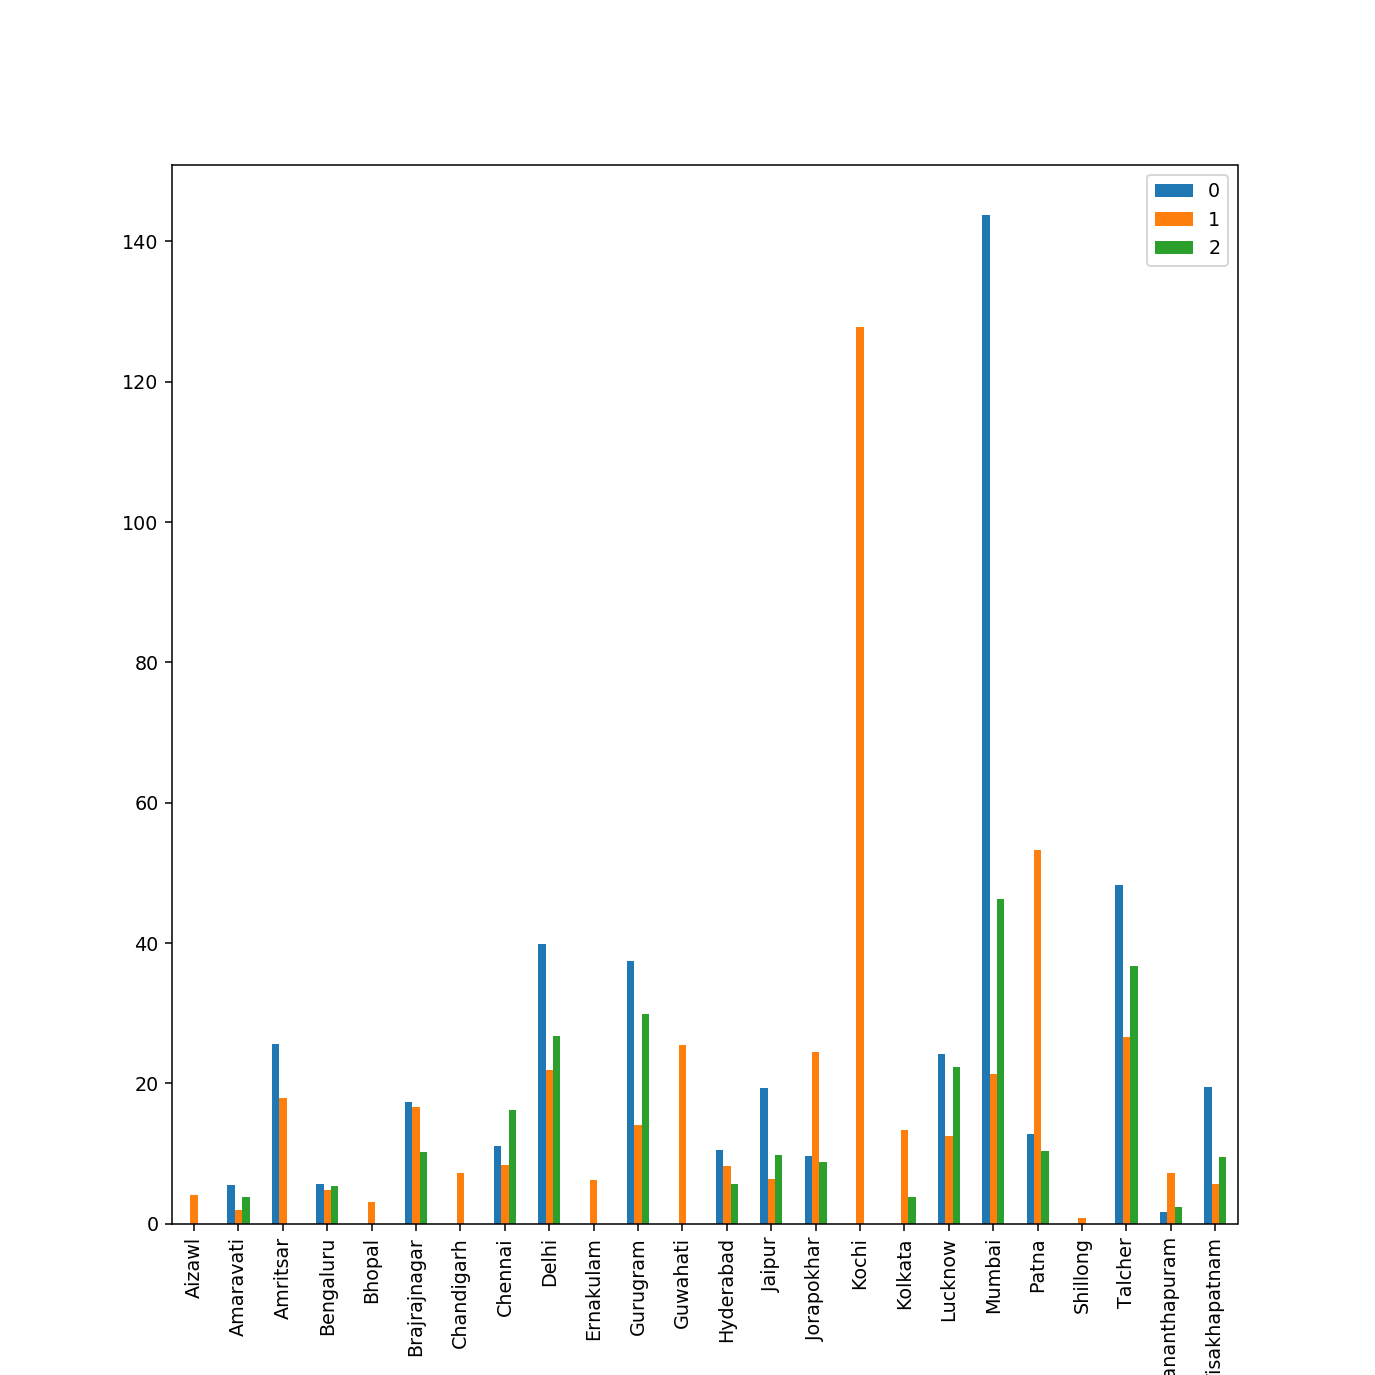

In [158]:
Mean_no_in_Feb_March_April_2018.transpose().plot(figsize=(10,10),kind='bar')

As far as Motropolitan cities like Mumbai, Bengaluru, Delhi, Chandigad and Hydrabad are considered, we can see same trend in nearly all these cities by February, March and April. Their levels are dropping and these trends are only in the year 2020.  
If we see the year 2019 or 2018, we cannot find this dropping trend in these cities. So we can say that Air Quality Index (AQI) has decreased due to lockdown.